### Author's Information
1. Name: Kamalini Pradhan
2. Date: 07/28/2024
3. Purpose: Explore Ensembles

# Lab 5 - Ensembles 
Here is what we will do:
1. Create a data set with two input features and a 3 category target
2. Train a decision tree on the data set for a baseline
3. Train 3 ensemble models
    - Serial Ada Boosted DT
    - Decision Forest
    - Ensemble of DT, SVM, and NN
3. Get model performance on train and test sets
4. Create appropriate graphs
5. Do a 10 fold cross validation with 

### Prepare the data

### Settings for the generated dataset
This data set will be spirals with noise
arms - This is the number of categories we will have
turns - How many times we go around the spiral
width - How wide is the spiral (percentage of the radius)
noise - How much noise we will add to the data.
size - The number of points to generate

In [28]:
arms = 4
turns = 1.5
width = 0.3
noise = .25
size = 4000

### The spirals will be based on the equation r=theta

Build set
Arm 0
Using offset 0.0
Arm 1
Using offset 1.5707963267948966
Arm 2
Using offset 3.141592653589793
Arm 3
Using offset 4.71238898038469


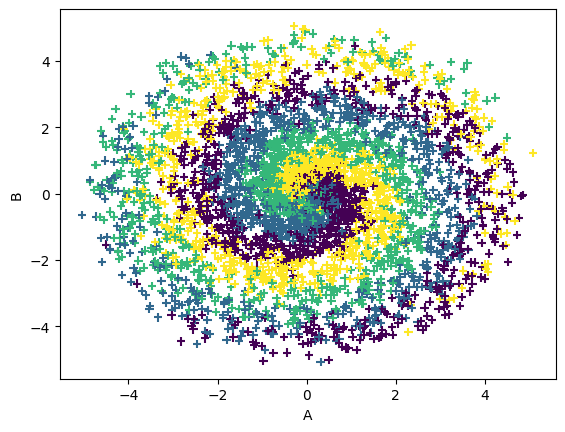

In [33]:
import numpy as np
import pandas as pd


def build_arm(n):
    print("Arm", n)
    points_per_arm = int(size/arms)
    #Get points on the curve
    theta_values = np.random.uniform(0, np.pi*turns, points_per_arm)
    r_values = theta_values
    target_values = [n] * points_per_arm
    
    #Add make the arm wider
    lower_fraction = (1 - width)*theta_values
    upper_fraction = (1 + width)*theta_values
    difference = upper_fraction - lower_fraction
    location = np.random.uniform(0, 1, points_per_arm)
    theta_values = theta_values + lower_fraction + difference*location
    
    #offset angle 
    offset = n*2*np.pi/arms
    print('Using offset', offset)
    theta_values = theta_values + offset
    
    #draw the noise from a distribution centered on 0.0 with a standard deviation of noise
    x_noise_values = np.random.normal(0, noise, points_per_arm)
    y_noise_values = np.random.normal(0, noise, points_per_arm)
    x_values = r_values * np.sin(theta_values) + x_noise_values
    y_values = r_values * np.cos(theta_values) + y_noise_values
    
    
    return x_values, y_values, target_values
    

def build_set():
    data_x = np.array([])
    data_y = np.array([])
    data_t = np.array([])
    print("Build set")
    for i in range(0,arms):
        x, y, t = build_arm(i)
        #print(data_x)
        #print(x)
        #print(y)
        #print(t)
        # add each arm to the data set
        data_x=np.append(data_x, x)
        data_y=np.append(data_y, y)
        data_t=np.append(data_t, t)
     # create a dictionary with each feature
    d = {}
    d["A"] = data_x
    d["B"] = data_y
    d["Class"] = data_t

    #print(d)

    # Create the data frame from the dictionary
    
    dataframe = pd.DataFrame(data=d)
    return dataframe
    

spiral = build_set()

import matplotlib.pyplot as plt

#shuffle before plotting so we don't always overwrite with the same color
shuffled = spiral.sample(frac=1)
plt.scatter(shuffled['A'], shuffled['B'], c=shuffled['Class'], marker='+')

plt.xlabel('A')
plt.ylabel('B')
plt.show()
    




### Stratified Test/Train Data Split

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(spiral, spiral['Class']):
    train_set = spiral.iloc[train_indices]
    test_set = spiral.iloc[test_indices]
    



### A Helpful plotting function for showing true and false for the categories

In [31]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')



    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

### Train and evaluate Decision Tree model 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for decision tree on training data
  Default settings
Confusion Matrix
[[1067    0    0]
 [   0 1066    0]
 [   0    0 1066]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0

Results for decision tree on test data
  Default settings
Confusion Matrix
[[197  33  36]
 [ 37 196  34]
 [ 32  28 207]]
Accuracy is   0.75
Precision is  0.750191918695304
Recall is     0.75
F1 is         0.7499191386955546


### Train and evaluate SVC model 

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for svc on training data
  Default settings
Confusion Matrix
[[801 131 135]
 [186 773 107]
 [181 147 738]]
Accuracy is   0.7227258518286964
Precision is  0.7247674462814389
Recall is     0.7227258518286964
F1 is         0.7228197257408591

Results for svc on test data
  Default settings
Confusion Matrix
[[193  40  33]
 [ 49 185  33]
 [ 41  34 192]]
Accuracy is   0.7125
Precision is  0.7135229006961482
Recall is     0.7125
F1 is         0.712660995251848


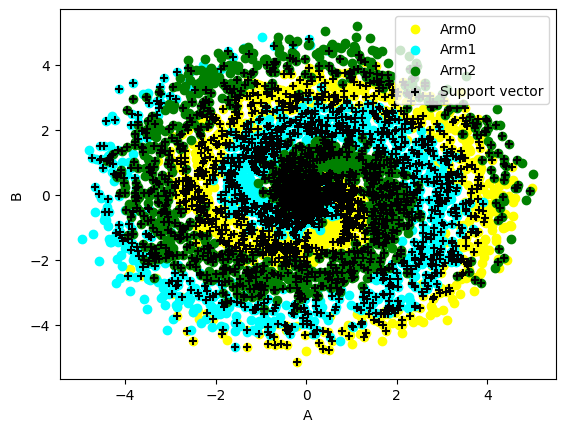

In [17]:
import matplotlib.pyplot as plt
arm0_A = np.ma.masked_where(spiral['Class']!=0, 
                     spiral['A'])

arm1_A = np.ma.masked_where(spiral['Class']!=1, 
                     spiral['A'])

arm2_A = np.ma.masked_where(spiral['Class']!=2, 
                     spiral['A'])



# get the values for the support vectors (the special instances)
support_x = [x for (x,y) in svc_model.support_vectors_]
support_y = [y for (x,y) in svc_model.support_vectors_]




b = spiral['B']
plt.scatter(arm0_A, b, c='yellow', marker='o')
plt.scatter(arm1_A, b, c='cyan', marker='o')
plt.scatter(arm2_A, b, c='green', marker='o')
plt.scatter(support_x, support_y, c='black', marker='+')

plt.xlabel('A')
plt.ylabel('B')
plt.legend(['Arm0', 'Arm1', 'Arm2','Support vector'])
plt.show()

### Train and evaluate Neural Net model 

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))




Results for NN on train data
  Default settings
Confusion Matrix
[[906  79  82]
 [ 91 895  80]
 [ 89  79 898]]
Accuracy is   0.8437011566114411
Precision is  0.8437891756344771
Recall is     0.8437011566114411
F1 is         0.843710465461251

Results for NN on test data
  Default settings
Confusion Matrix
[[205  36  25]
 [ 29 213  25]
 [ 17  15 235]]
Accuracy is   0.81625
Precision is  0.8160366816227911
Recall is     0.81625
F1 is         0.8156101524760929


c:\MS\data_analytics\github\44670_MachineLearning\AMLLAB5\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Results
Basic results for our classification model to predict arm on the spiral data set

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|A,B|100.0|100.0|71.62 | 71.63 |
|SVC|A,B|71.58|71.58|70.5|70.42|
|MLP|A,B layers (50,25,10) lbfgs|84.37|84.37|81.63|81.56

### Train and evaluate ADA boosted model

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=150)


X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

ada_model.fit(X,y)
y_pred = ada_model.predict(X)
y_test_pred = ada_model.predict(X_test)


print('Results for ADA on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

print('Results for ADA on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

c:\MS\data_analytics\github\44670_MachineLearning\AMLLAB5\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Results for ADA on train data
  Default settings
Confusion Matrix
[[696 210 161]
 [171 731 164]
 [197 221 648]]
Accuracy is   0.6486402000625195
Precision is  0.649736248425311
Recall is     0.6486402000625195
F1 is         0.6483395371114752

Results for ADA on test data
  Default settings
Confusion Matrix
[[164  55  47]
 [ 60 171  36]
 [ 58  39 170]]
Accuracy is   0.63125
Precision is  0.6329908951540433
Recall is     0.63125
F1 is         0.6317893238148713


# Results
Basic results for our classification model to predict arm on the spiral data set

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|A,B|100.0|100.0|71.62 | 71.63 |
|SVC|A,B|71.58|71.58|70.5|70.42|
|MLP|A,B layers (50,25,10) lbfgs|84.37|84.37|81.63|81.56|
|ADA|A,B, n_estimators=150| 64.86 | 64.83 | 63.13 | 63.18

### Train and evaluate Random Forest model

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=150)

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

rf_model.fit(X,y)
y_pred = rf_model.predict(X)

y_test_pred = rf_model.predict(X_test)
print('Results for RF on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

print('Results for RF on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))




Results for RF on train data
  Default settings
Confusion Matrix
[[800   0   0   0]
 [  0 800   0   0]
 [  0   0 800   0]
 [  0   0   0 800]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0

Results for RF on test data
  Default settings
Confusion Matrix
[[119  45   7  29]
 [ 28 127  43   2]
 [  4  35 123  38]
 [ 34   6  38 122]]
Accuracy is   0.61375
Precision is  0.6152923047054043
Recall is     0.61375
F1 is         0.6139437478552155


# Results
Basic results for our classification model to predict arm on the spiral data set

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|A,B|100.0|100.0|71.62 | 71.63 |
|SVC|A,B|71.58|71.58|70.5|70.42|
|MLP|A,B layers (50,25,10) lbfgs|84.37|84.37|81.63|81.56|
|ADA|A,B, n_estimators=150| 64.86 | 64.83 | 63.13 | 63.18|
RF |A,B, n_estimators=150| 1.0 | 1.0 | 79.12 | 79.11

### Train and evaluate Voting model
### We build it out of three different kinds of classifiers
### One each of DT, SVC and NN

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Build the classifiers
vc1_dt = DecisionTreeClassifier()
vc2_svm = SVC()
vc3_nn = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
# Bundle into a list with names
vcList = [('DT',vc1_dt),
 ('SVM',vc2_svm),
 ('NN',vc3_nn)]

vc_model = VotingClassifier(vcList)

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

vc_model.fit(X,y)
y_pred = vc_model.predict(X)

y_test_pred = vc_model.predict(X_test)

print('Results for Voting on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

print('Results for Voting on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))


c:\MS\data_analytics\github\44670_MachineLearning\AMLLAB5\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Results for Voting on train data
  Default settings
Confusion Matrix
[[975  59  33]
 [ 58 950  58]
 [ 91  36 939]]
Accuracy is   0.8952797749296655
Precision is  0.8960507584834951
Recall is     0.8952797749296655
F1 is         0.8953464301070425

Results for Voting on test data
  Default settings
Confusion Matrix
[[205  36  25]
 [ 34 205  28]
 [ 32  16 219]]
Accuracy is   0.78625
Precision is  0.7864607882243777
Recall is     0.78625
F1 is         0.7862149019050356


# Results
Basic results for our classification model to predict arm on the spiral data set

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|A,B|100.0|100.0|71.62 | 71.63 |
|SVC|A,B|71.58|71.58|70.5|70.42|
|MLP|A,B layers (50,25,10) lbfgs|84.37|84.37|81.63|81.56|
|ADA|A,B, n_estimators=150| 64.86 | 64.83 | 63.13 | 63.18|
|RF |A,B, n_estimators=150| 1.0 | 1.0 | 79.12 | 79.11|
|Voting| [DT, SVC, MLP]| 89.53 |89.53|78.63 | 78.62

### Cross Validate a Decision Tree model 

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
accuracy_list = np.array([])
f1_list = np.array([])
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

for train_indices, validate_indices in splitter.split(spiral,
spiral['Class']):
    train_set = spiral.iloc[train_indices]
    validate_set = spiral.iloc[validate_indices]
    X = train_set[['A','B' ]]
    y = train_set['Class']
    X_validate = validate_set[['A','B']]
    y_validate = validate_set['Class']
    model = DecisionTreeClassifier()
    model.fit(X,y)
    y_validate_pred = model.predict(X_validate)
    accuracy = accuracy_score(y_validate, y_validate_pred)
    print("Confusion Matrix")
    print(confusion_matrix(y_validate, y_validate_pred))
    print('Accuracy is ', accuracy)
    accuracy_list = np.insert(accuracy_list, 0, accuracy)
    
print("Accuracy values", accuracy_list)
print(" Average of ", np.average(accuracy_list))
print(" StDev of ", np.std(accuracy_list))


Confusion Matrix
[[106  13  15]
 [ 23  95  15]
 [ 16  18  99]]
Accuracy is  0.75
Confusion Matrix
[[109  12  13]
 [ 18  93  22]
 [ 17  13 103]]
Accuracy is  0.7625
Confusion Matrix
[[100  15  19]
 [ 12 108  13]
 [ 10  23 100]]
Accuracy is  0.77
Confusion Matrix
[[106  18   9]
 [ 25  91  18]
 [ 20  18  95]]
Accuracy is  0.73
Confusion Matrix
[[100  16  17]
 [ 16 104  14]
 [ 21  14  98]]
Accuracy is  0.755
Confusion Matrix
[[ 93  20  20]
 [ 16 103  15]
 [ 18  17  98]]
Accuracy is  0.735
Confusion Matrix
[[ 98  16  19]
 [ 15 103  15]
 [ 14  18 102]]
Accuracy is  0.7575
Confusion Matrix
[[102  14  17]
 [ 16  97  20]
 [ 23  18  93]]
Accuracy is  0.73
Confusion Matrix
[[ 99  19  15]
 [ 14 102  17]
 [ 12  14 108]]
Accuracy is  0.7725
Confusion Matrix
[[ 90  25  18]
 [  8 108  17]
 [ 21  13  99]]
Accuracy is  0.7443609022556391
Accuracy values [0.7443609 0.7725    0.73      0.7575    0.735     0.755     0.73
 0.77      0.7625    0.75     ]
 Average of  0.750686090225564
 StDev of  0.0148183744

# Results

|Parameter Changed| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|:---|
|NO (arms=3)|RF |A,B, n_estimators=150| 1.0 | 1.0 | 79.12 | 79.11|
|YES (arms=4)|RF|A,B, n_estimators=150| 1.0 | 1.0 | 61.37 | 61.39|